In [7]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import geopandas as gpd

# connect to the API:change accordingly
api = SentinelAPI('user', 'pw', 'https://apihub.copernicus.eu/apihub/')

In [8]:
footprint= gpd.read_file("aoi_4326.geojson", driver='GeoJSON')

In [10]:
footprint.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

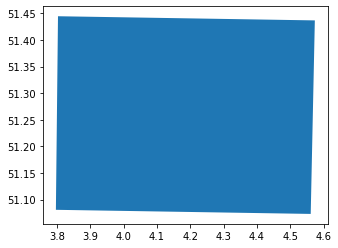

In [9]:
footprint.plot()

In [11]:
footprint = geojson_to_wkt(read_geojson("aoi_4326.geojson"))

In [12]:
footprint

'POLYGON((3.8026 51.4445,4.5739 51.4367,4.5616 51.0730,3.7963 51.0807,3.8026 51.4445))'

##### S2 

In [13]:
s2products = api.query(footprint,
                     date = ('20210101', '20210120'),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 20))

In [14]:
len(s2products)

3

In [15]:
s2products_df = api.to_dataframe(s2products)

In [16]:
s2products_df

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,platformserialidentifier,processinglevel,identifier,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid,granuleidentifier,datastripidentifier
75bc0406-d7cc-462d-9a1e-9f4529c7fd41,S2B_MSIL2A_20210113T110319_N0214_R094_T31UET_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-13T11:03:19.024Z, Instrument: MS...",false,2021-01-13 11:03:19.024,2021-01-13 11:03:19.024,2021-01-13 20:41:00.911,20140,...,Sentinel-2B,Level-2A,S2B_MSIL2A_20210113T110319_N0214_R094_T31UET_2...,75bc0406-d7cc-462d-9a1e-9f4529c7fd41,NaT,NaN,NaN,NaN,NaN,NaN
952aba15-eb66-4abf-95d0-ddbdf8f739f4,S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-13T11:03:19.024Z, Instrument: MS...",false,2021-01-13 11:03:19.024,2021-01-13 11:03:19.024,2021-01-13 14:34:09.022,20140,...,Sentinel-2B,Level-1C,S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_2...,952aba15-eb66-4abf-95d0-ddbdf8f739f4,2021-01-13 11:03:19.024,INS-NOBS,31UET,UT31E,S2B_OPER_MSI_L1C_TL_EPAE_20210113T115914_A0201...,S2B_OPER_MSI_L1C_DS_EPAE_20210113T115914_S2021...
5392988e-5033-49c9-a3dd-fb379292e1bb,S2B_MSIL1C_20210110T105329_N0209_R051_T31UES_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-10T10:53:29.024Z, Instrument: MS...",false,2021-01-10 10:53:29.024,2021-01-10 10:53:29.024,2021-01-10 15:23:26.906,20097,...,Sentinel-2B,Level-1C,S2B_MSIL1C_20210110T105329_N0209_R051_T31UES_2...,5392988e-5033-49c9-a3dd-fb379292e1bb,2021-01-10 10:53:29.024,INS-NOBS,31UES,US31E,S2B_OPER_MSI_L1C_TL_VGS2_20210110T130049_A0200...,S2B_OPER_MSI_L1C_DS_VGS2_20210110T130049_S2021...


In [17]:
api.download_all(s2products_df.index)

There was an error downloading 75bc0406-d7cc-462d-9a1e-9f4529c7fd41
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 887, in _download_online_retry
    ret_val = self.download(product_info["id"], directory_path, checksum)
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 625, in download
    product_info["downloaded_bytes"] = self._download(
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1103, in _download
    self._tqdm(
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1126, in _tqdm
    return tqdm(**kwargs)
TypeError: __init__() got an unexpected keyword argument 'initial'
There was an error downloading 75bc0406-d7cc-462d-9a1e-9f4529c7fd41
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 887, in _download_online_retr

({},
 {'952aba15-eb66-4abf-95d0-ddbdf8f739f4': {'id': '952aba15-eb66-4abf-95d0-ddbdf8f739f4',
   'title': 'S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_20210113T115914',
   'size': 515454856,
   'md5': '95ECEFA5F0CAE6E572AD4B10374D1356',
   'date': datetime.datetime(2021, 1, 13, 11, 3, 19, 24000),
   'footprint': 'POLYGON((4.339845138211645 52.34133618715632,4.280259146295085 52.23113729463056,4.202973778021864 52.087285744809606,4.126620672807489 51.94342777532778,4.050866814137378 51.799569984604624,3.975736358766384 51.65565062521242,3.900776129260918 51.511703439393806,3.826180700963278 51.36770114344026,3.821048752944145 51.35771624647961,2.999712727409819 51.36324170782969,2.999706370881351 52.3504731573947,4.339845138211645 52.34133618715632))',
   'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('952aba15-eb66-4abf-95d0-ddbdf8f739f4')/$value",
   'Online': False,
   'Creation Date': datetime.datetime(2021, 1, 13, 14, 35, 11, 485000),
   'Ingestion Date': datetime.d

In [18]:
api.download_all(s2products)

There was an error downloading 75bc0406-d7cc-462d-9a1e-9f4529c7fd41
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 887, in _download_online_retry
    ret_val = self.download(product_info["id"], directory_path, checksum)
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 625, in download
    product_info["downloaded_bytes"] = self._download(
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1103, in _download
    self._tqdm(
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 1126, in _tqdm
    return tqdm(**kwargs)
TypeError: __init__() got an unexpected keyword argument 'initial'
There was an error downloading 75bc0406-d7cc-462d-9a1e-9f4529c7fd41
Traceback (most recent call last):
  File "C:\Users\hp\.conda\envs\GeoData\lib\site-packages\sentinelsat\sentinel.py", line 887, in _download_online_retr

({},
 {'952aba15-eb66-4abf-95d0-ddbdf8f739f4': {'id': '952aba15-eb66-4abf-95d0-ddbdf8f739f4',
   'title': 'S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_20210113T115914',
   'size': 515454856,
   'md5': '95ECEFA5F0CAE6E572AD4B10374D1356',
   'date': datetime.datetime(2021, 1, 13, 11, 3, 19, 24000),
   'footprint': 'POLYGON((4.339845138211645 52.34133618715632,4.280259146295085 52.23113729463056,4.202973778021864 52.087285744809606,4.126620672807489 51.94342777532778,4.050866814137378 51.799569984604624,3.975736358766384 51.65565062521242,3.900776129260918 51.511703439393806,3.826180700963278 51.36770114344026,3.821048752944145 51.35771624647961,2.999712727409819 51.36324170782969,2.999706370881351 52.3504731573947,4.339845138211645 52.34133618715632))',
   'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('952aba15-eb66-4abf-95d0-ddbdf8f739f4')/$value",
   'Online': False,
   'Creation Date': datetime.datetime(2021, 1, 13, 14, 35, 11, 485000),
   'Ingestion Date': datetime.d

##### S1

In [56]:
s1products = api.query(footprint,
                     date=('20210101', '20210104'),
                     platformname='Sentinel-1',
                     polarisationmode='VV VH',
                     sensoroperationalmode='IW',
                     orbitdirection='DESCENDING')

In [57]:
len(s1products)

5

In [58]:
s1products_df = api.to_dataframe(s1products)

In [59]:
s1products_df 

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,gmlfootprint,footprint,uuid,productconsolidation
1c7a8848-0724-4be9-a5c7-f48f49fca62e,S1B_IW_SLC__1SDV_20210103T055800_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:58:00.051Z, Instrument: SA...",false,2021-01-03 05:58:00.051,2021-01-03 05:58:27.150,2021-01-03 11:05:40.869,194890,...,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.266184 50.274563, 5.794876 5...",1c7a8848-0724-4be9-a5c7-f48f49fca62e,NaN
01f301de-5992-402d-8781-5e704b18bfc9,S1B_IW_GRDH_1SDV_20210103T055801_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:58:01.044Z, Instrument: SA...",false,2021-01-03 05:58:01.044,2021-01-03 05:58:26.043,2021-01-03 10:21:24.712,194890,...,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.282145 50.341362, 5.773809 5...",01f301de-5992-402d-8781-5e704b18bfc9,NaN
cc456251-abaa-4fc0-934b-62243ebd0228,S1B_IW_OCN__2SDV_20210103T055801_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:58:01.044Z, Instrument: SA...",false,2021-01-03 05:58:01.044,2021-01-03 05:58:26.043,2021-01-03 10:21:16.996,194890,...,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.282145 50.341362, 5.773809 5...",cc456251-abaa-4fc0-934b-62243ebd0228,NaN
bd7ffff1-9e39-4610-b864-9086c3db0a50,S1B_IW_RAW__0SDV_20210103T055757_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:57:57.346Z, Instrument: SA...",false,2021-01-03 05:57:57.346,2021-01-03 05:58:29.745,2021-01-03 09:04:37.661,194890,...,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VH VV,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.1976 49.9878, 5.8159 51.9303...",bd7ffff1-9e39-4610-b864-9086c3db0a50,SLICE
af7220a0-86b3-4bd2-82b7-9af9b35ebc6b,S1B_IW_GRDH_1SDV_20210103T055755_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:57:55.956Z, Instrument: SA...",false,2021-01-03 05:57:55.956,2021-01-03 05:58:20.955,2021-01-03 06:40:47.507,194890,...,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.375964 50.64587, 5.870062 52...",af7220a0-86b3-4bd2-82b7-9af9b35ebc6b,NaN


In [60]:
api.download_all(s1products_df.index)

CancelledError: 

In [61]:
api.download_all(s1products)

CancelledError: 